In [11]:
import os
import nibabel
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
import ia_mri_tools
from ia_mri_tools.ia_mri_tools import coil_correction, textures

In [3]:
# Load the data
data_path = os.path.join(os.path.split(ia_mri_tools.__file__)[0], 'data/HCP/100307')
T1 = nibabel.load(os.path.join(data_path, 'T1w_acpc_dc.nii.gz')).get_data()
T2 = nibabel.load(os.path.join(data_path, 'T2w_acpc_dc.nii.gz')).get_data()

In [4]:
# Calculate and apply the coil correction
C = coil_correction([T1, T2], box_size=50)
cT1 = C*T1
cT2 = C*T2

In [5]:
# Compute some textures
scales = [1, 2, 4, 8]
ns = len(scales)

tT1 = textures(cT1, scales)
tT2 = textures(cT2, scales)

In [6]:
# Load the Freesurfer segmentation
segs = nibabel.load(os.path.join(data_path, 'aparc+aseg.nii.gz')).get_data()

In [7]:
# Reshape data to 1D
nvox = np.product(segs.shape)
rT1 = np.reshape(cT1, nvox)
rT2 = np.reshape(cT2, nvox)
rtT1 = np.reshape(tT1,[nvox, tT1.shape[3]])
rtT2 = np.reshape(tT2,[nvox, tT2.shape[3]])
rsegs = np.reshape(segs, nvox)

In [8]:
# Labels to grab from Freesurfer segmentation
tissue = ({
    'gray': 2001,
    'white': 41,
    'caudate': 50,
    'thalamus': 49,
    'putamen': 51,
    'pallidum': 52,
    'amygdala': 54})

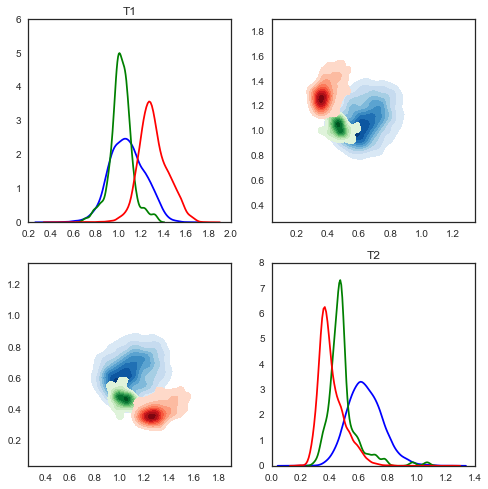

In [13]:
# Down-sample the data for plotting
dsegs = rsegs[::100]
dT1 = rT1[::100]
dT2 = rT2[::100]

# View coil corrected scatter plots of tissue ROIs
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('T1')
sns.kdeplot(dT1[dsegs>=(tissue['gray'])], color='b')
sns.kdeplot(dT1[dsegs==(tissue['caudate'])], color='g')
sns.kdeplot(dT1[dsegs==(tissue['white'])], color='r')
plt.subplot(2,2,2)
sns.kdeplot(dT2[dsegs>=(tissue['gray'])] ,dT1[dsegs>=(tissue['gray'])], cmap='Blues', shade=True, shade_lowest=False)
sns.kdeplot(dT2[dsegs==(tissue['caudate'])], dT1[dsegs==(tissue['caudate'])], cmap='Greens', shade=True, shade_lowest=False)
sns.kdeplot(dT2[dsegs==(tissue['white'])], dT1[dsegs==(tissue['white'])], cmap='Reds', shade=True, shade_lowest=False)
plt.subplot(2,2,3)
sns.kdeplot(dT1[dsegs>=(tissue['gray'])], dT2[dsegs>=(tissue['gray'])], cmap='Blues', shade=True, shade_lowest=False)
sns.kdeplot(dT1[dsegs==(tissue['caudate'])], dT2[dsegs==(tissue['caudate'])], cmap='Greens', shade=True, shade_lowest=False)
sns.kdeplot(dT1[dsegs==(tissue['white'])], dT2[dsegs==(tissue['white'])], cmap='Reds', shade=True, shade_lowest=False)
plt.subplot(2,2,4)
plt.title('T2')
sns.kdeplot(dT2[dsegs>=(tissue['gray'])], color='b')
sns.kdeplot(dT2[dsegs==(tissue['caudate'])], color='g')
sns.kdeplot(dT2[dsegs==(tissue['white'])], color='r')

In [16]:
def scatter_plots(contrast, classes, data):
    Ncontrasts = len(contrast)
    class_colors=['Blues', 'Reds','Greens', 'Greys', 'Oranges']
    class_color=['b', 'r','g','k','y']

    fig, ax = plt.subplots(Ncontrasts, Ncontrasts, figsize=(20,20), squeeze=True)
    plt.tight_layout()
    
    for i in range(Ncontrasts):
        for j in range(Ncontrasts):
            if not i==j:
                for ind in range(len(classes)):
                    t = tissue[classes[ind]]
                    if t==tissue['gray']:
                        x = data[rsegs>=(tissue['gray']), contrast[j]]
                        y = data[rsegs>=(tissue['gray']), contrast[i]]
                        (sns.kdeplot(x[::100], y[::100], 
                                    cmap='Blues', shade=True, shade_lowest=False, ax=ax[i,j]))
                    else:
                        x = data[rsegs==(tissue[classes[ind]]), contrast[j]]
                        y = data[rsegs==(tissue[classes[ind]]), contrast[i]]
                        (sns.kdeplot(x[::30], y[::30], 
                            cmap=class_colors[ind], shade=True, shade_lowest=False, ax=ax[i,j]))
            else:
                for ind in range(len(classes)):
                    t = tissue[classes[ind]]
                    if t==tissue['gray']:
                        (sns.kdeplot(data[rsegs>=(tissue['gray']), contrast[j]], color='b', ax=ax[i,i]))
                    else:
                        (sns.kdeplot(data[rsegs==(tissue[classes[ind]]), contrast[j]], color=class_color[ind], ax=ax[i,i]))
                        

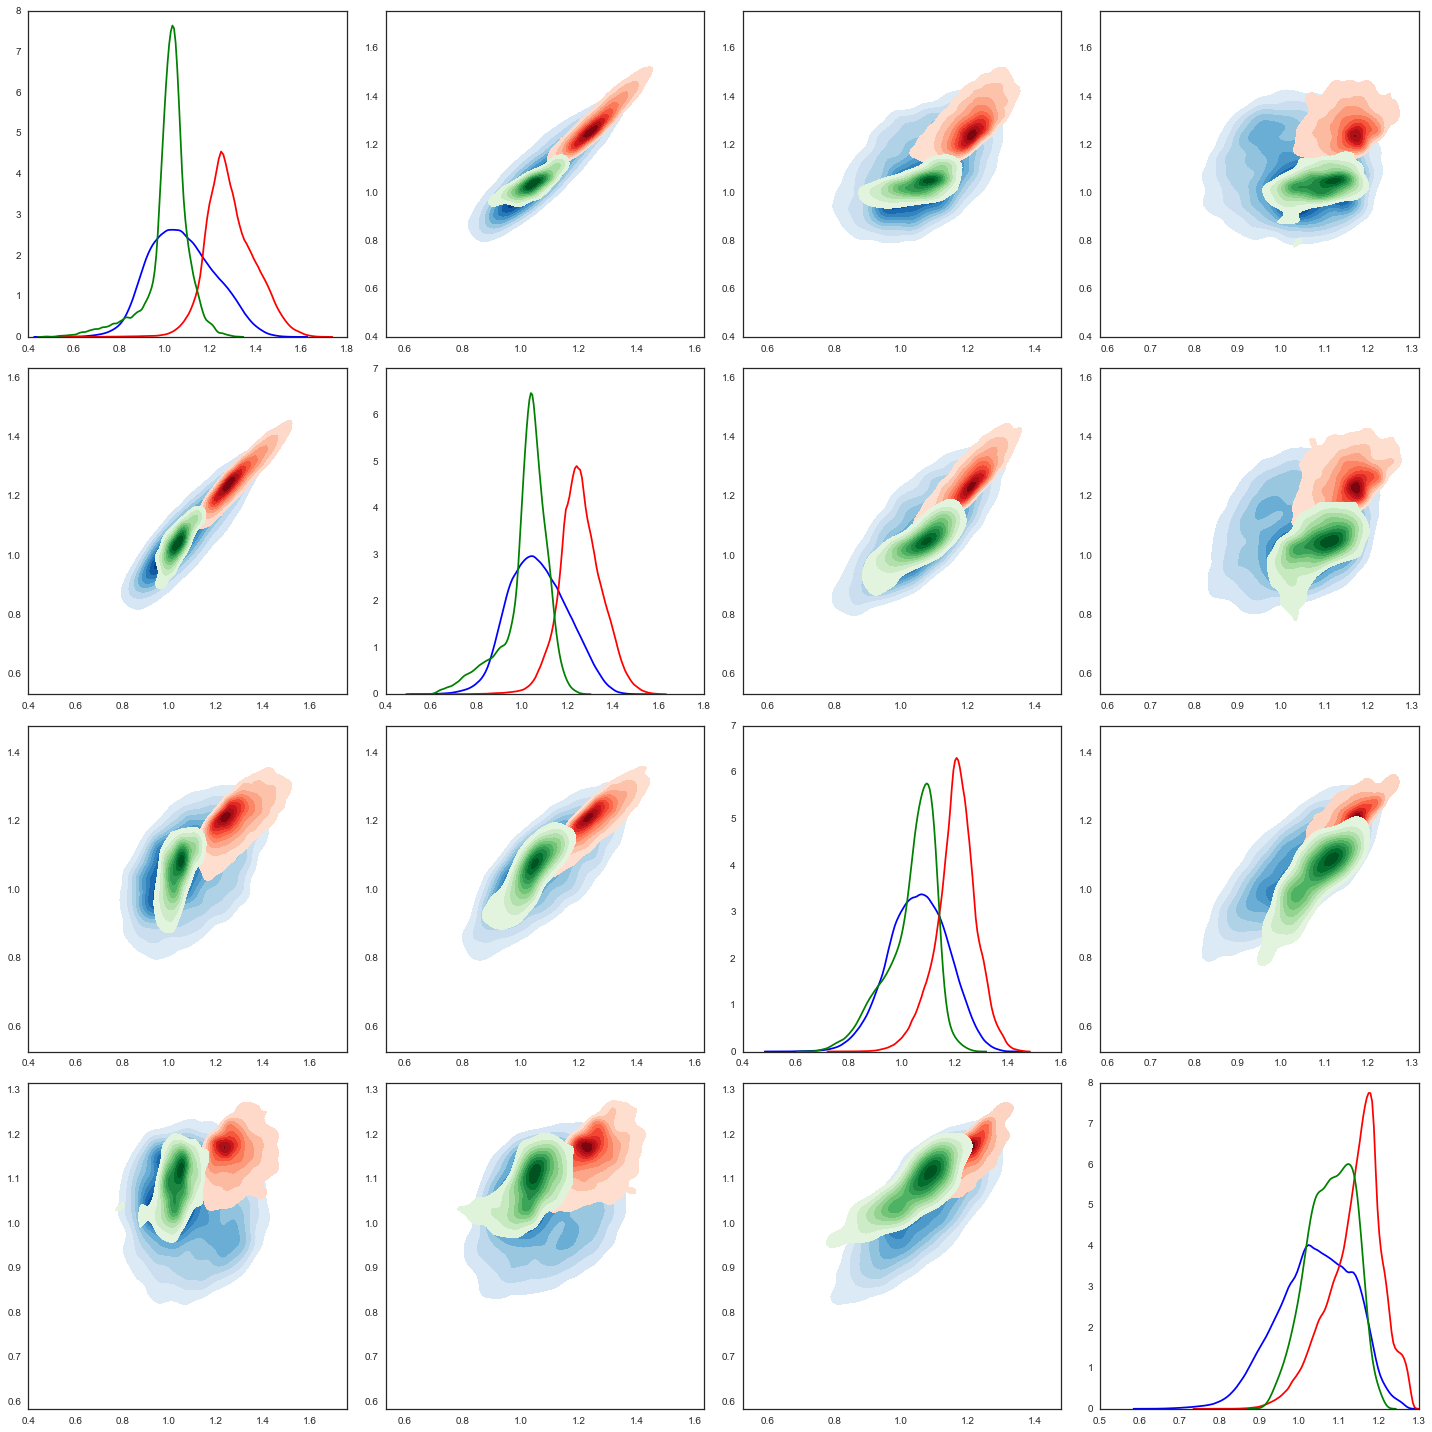

In [17]:
classes = ['gray', 'white', 'caudate']
contrasts = [0, 4, 8, 12]
figT1 = scatter_plots(contrasts, classes, rtT1)

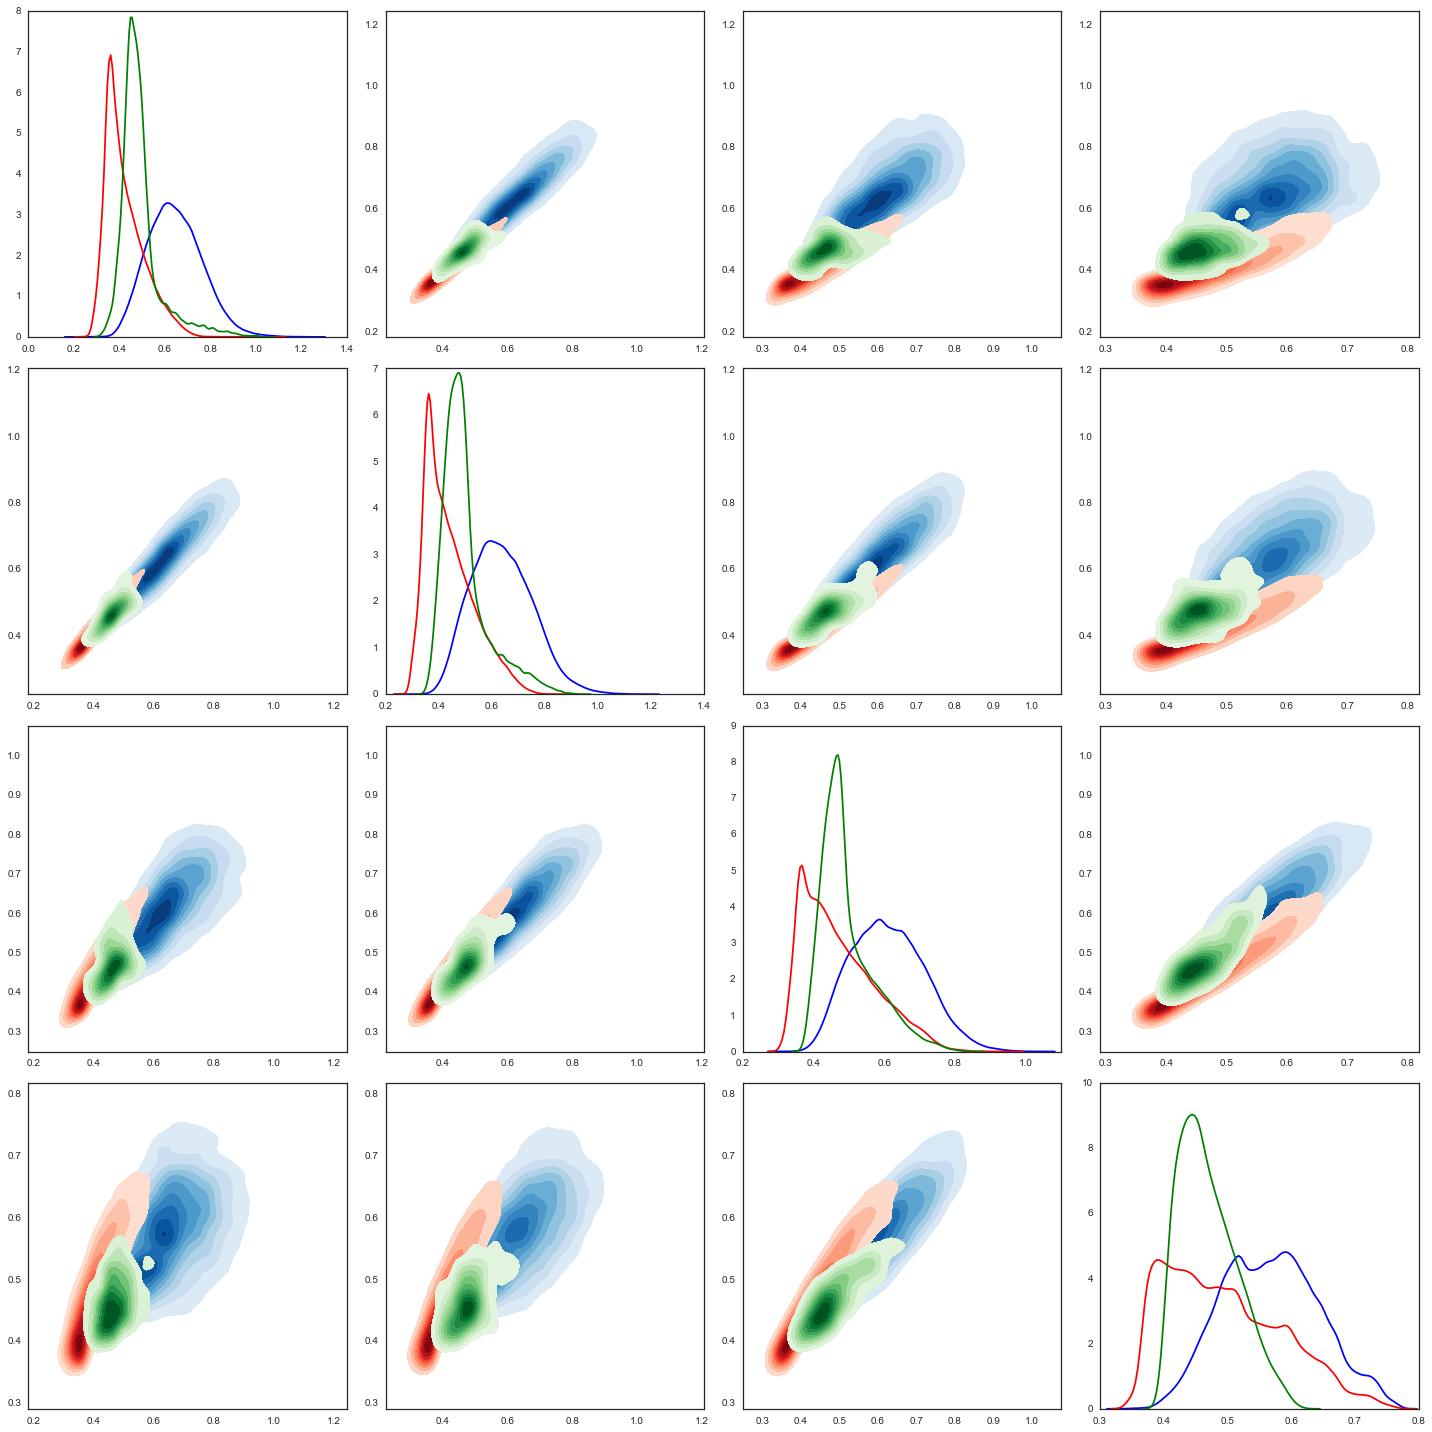

In [18]:
figT2 = scatter_plots(contrasts, classes, rtT2)

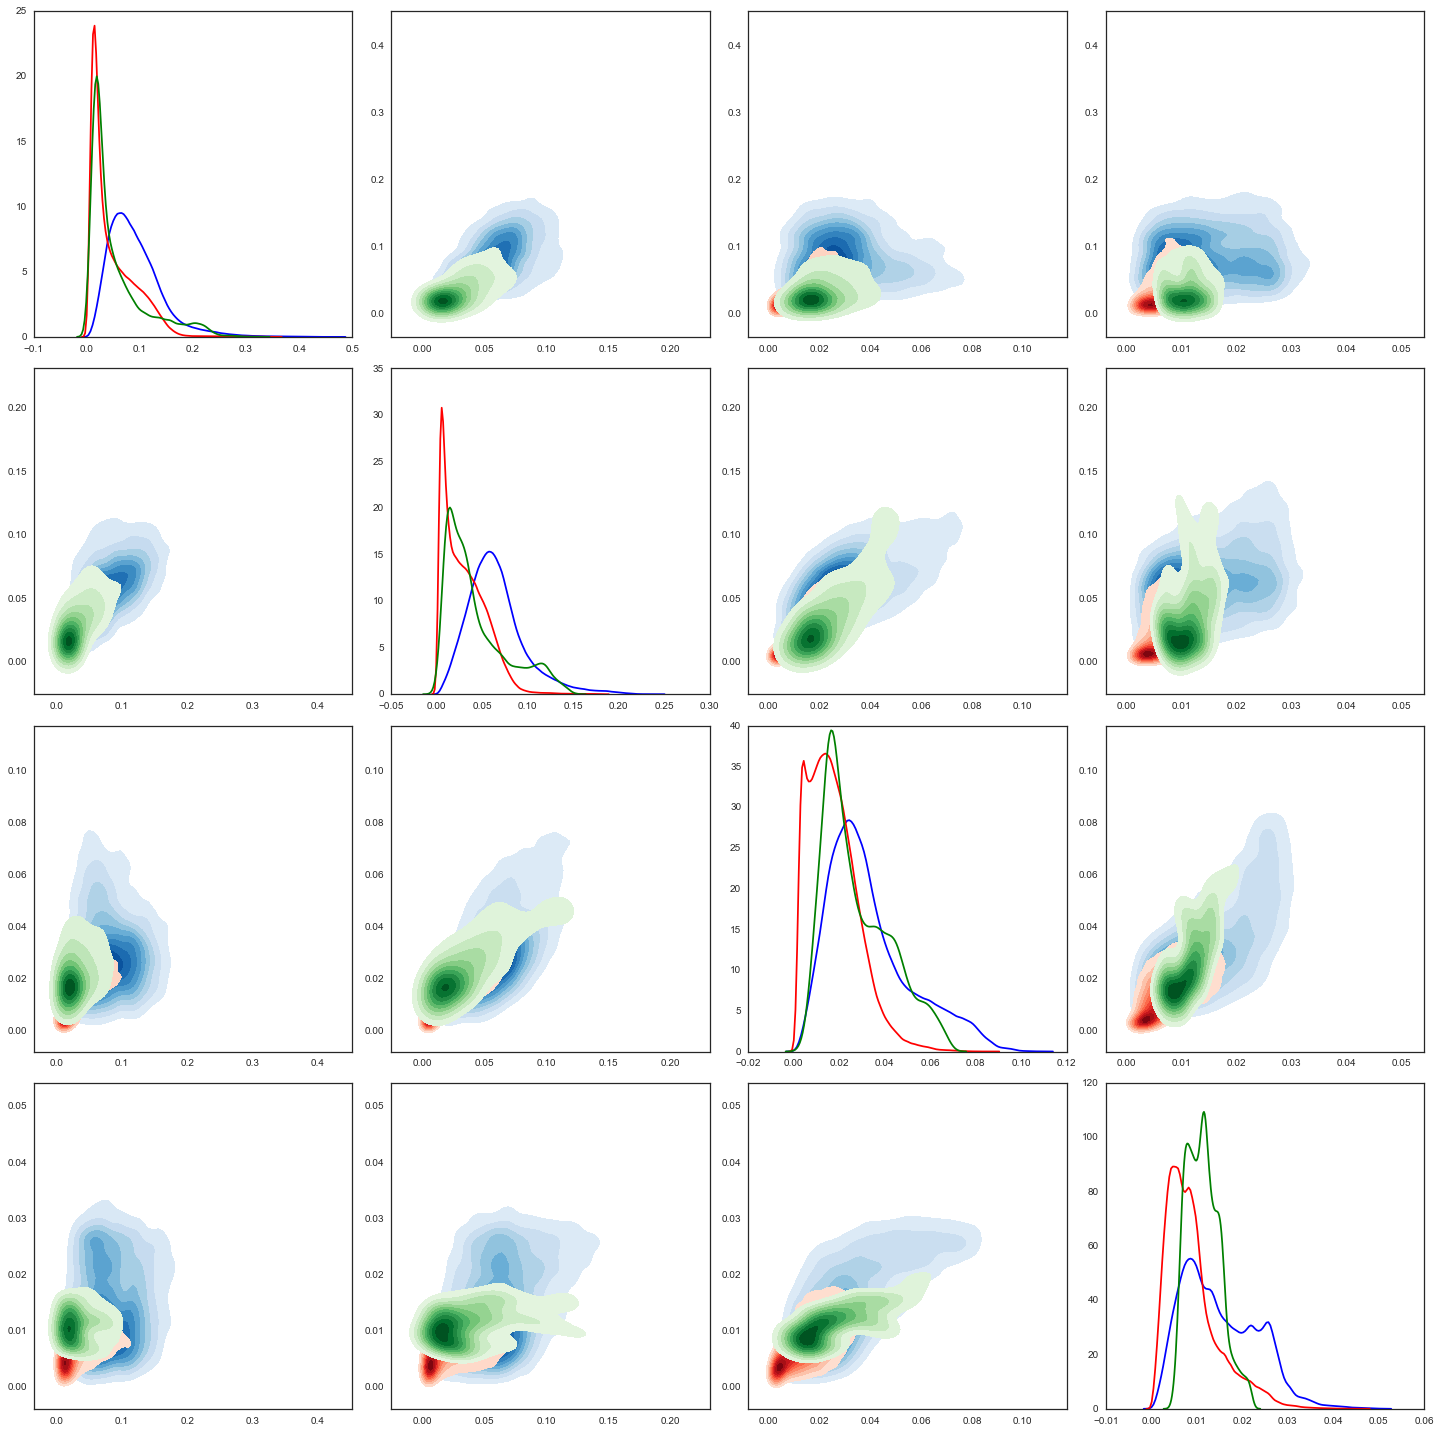

In [19]:
classes = ['gray', 'white', 'caudate']
contrasts = [1, 5, 9, 13]
fig1 = scatter_plots(contrasts, classes, rtT1)

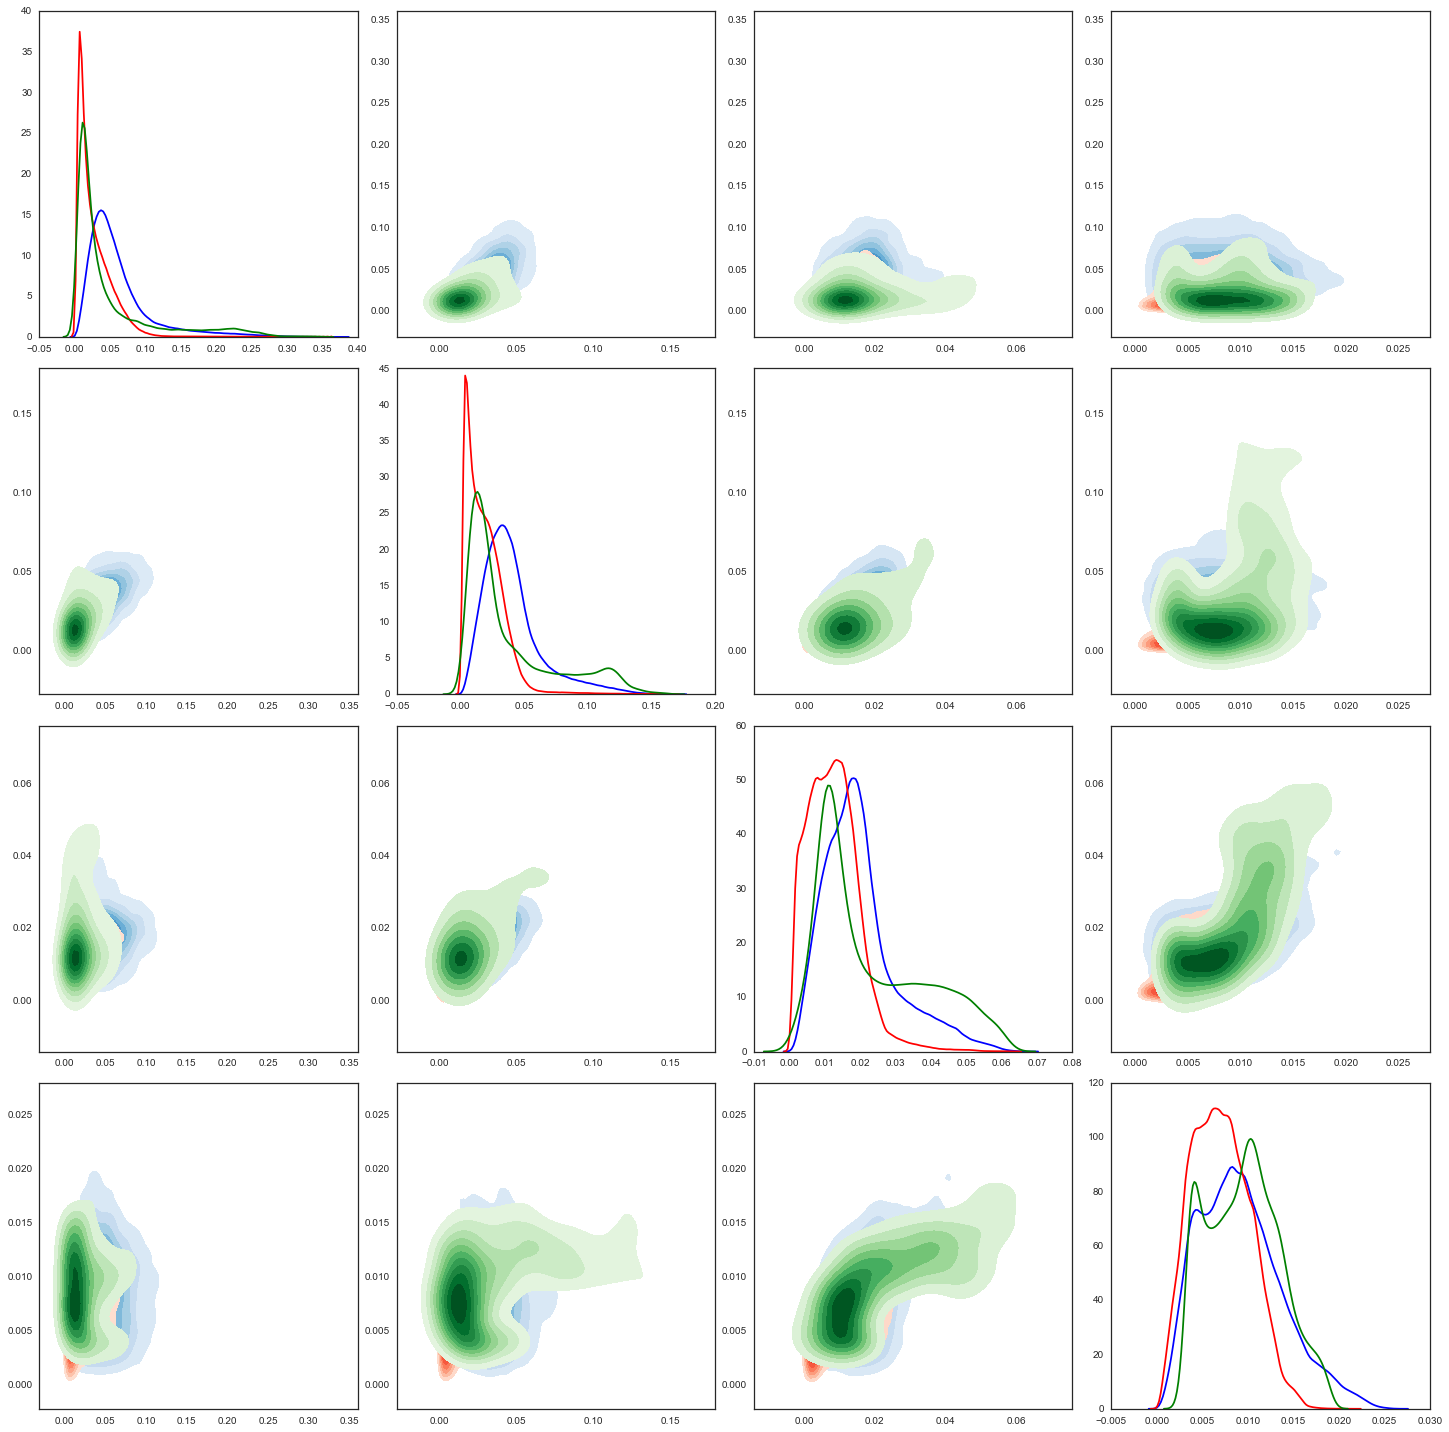

In [20]:
fig2 = scatter_plots(contrasts, classes, rtT2)

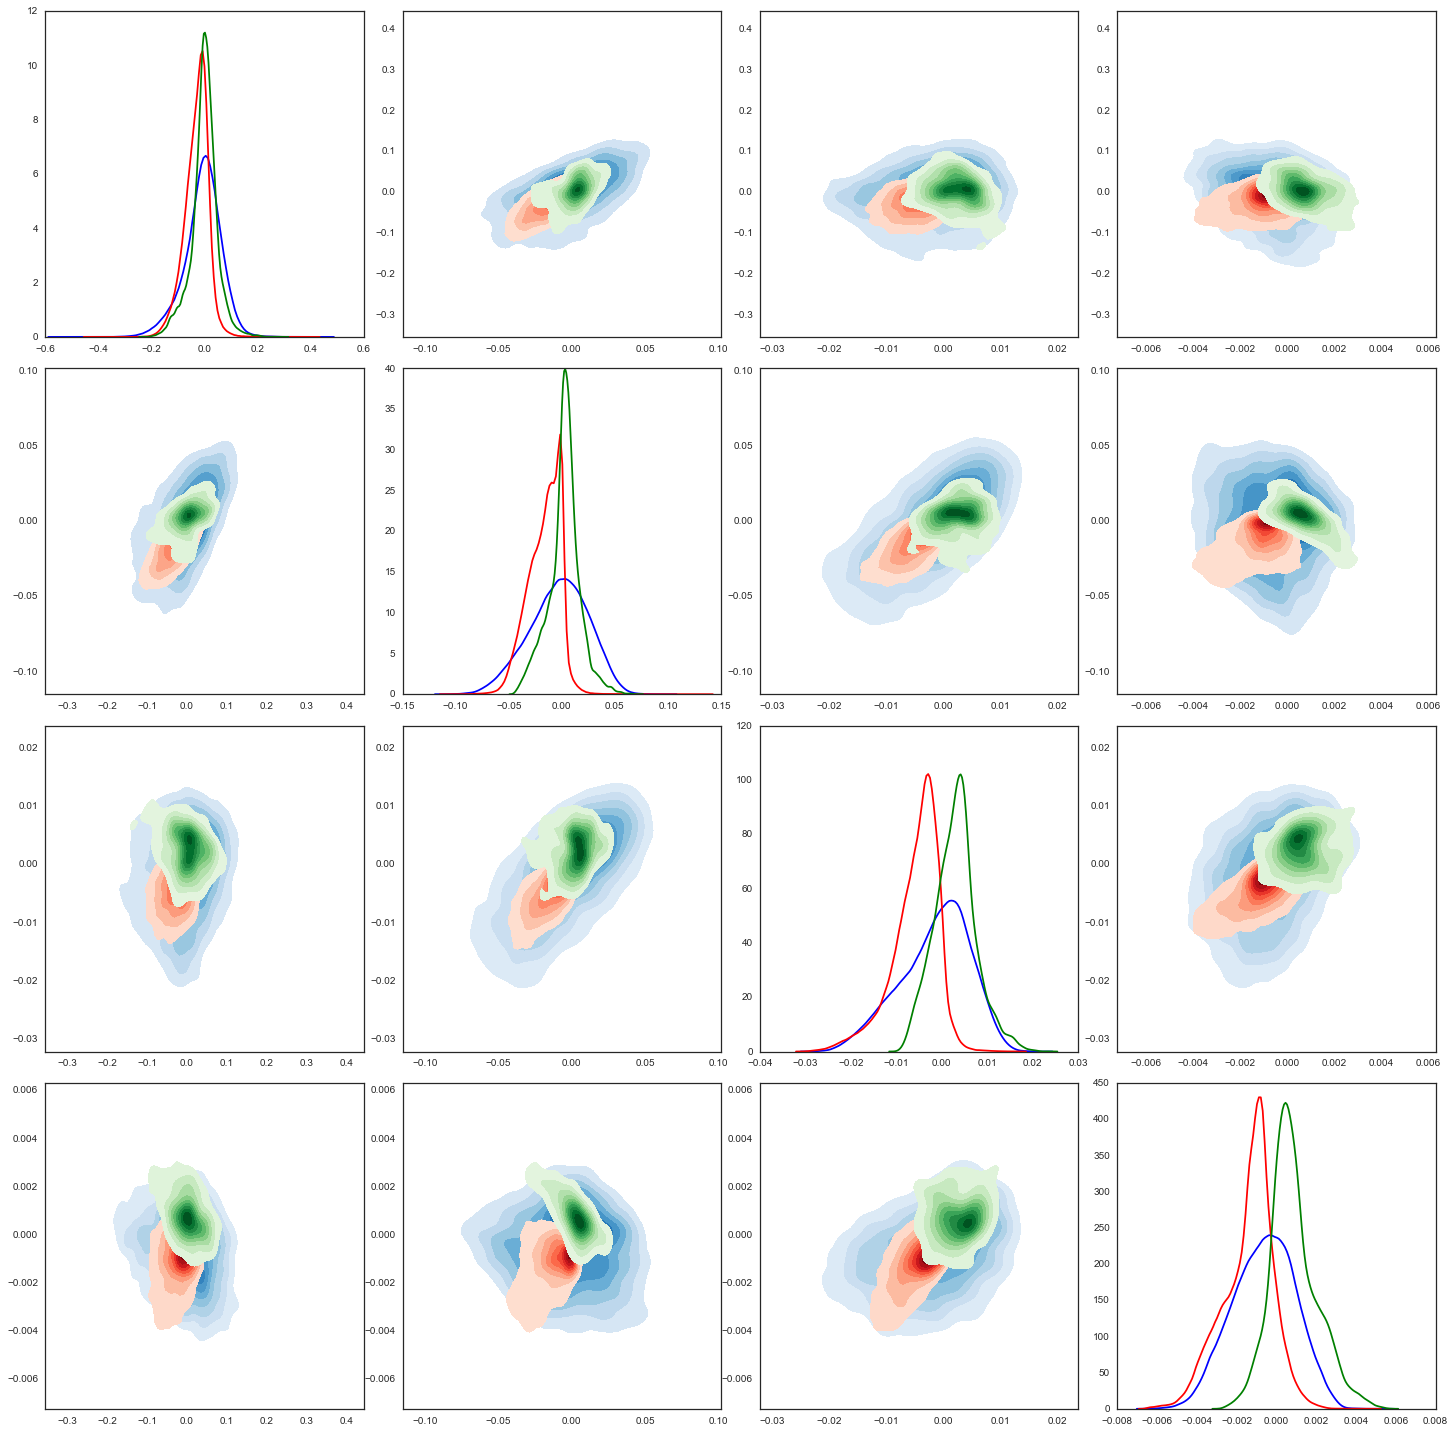

In [21]:
classes = ['gray', 'white', 'caudate']
contrasts = [2, 6, 10, 14]
fig1 = scatter_plots(contrasts, classes, rtT1)

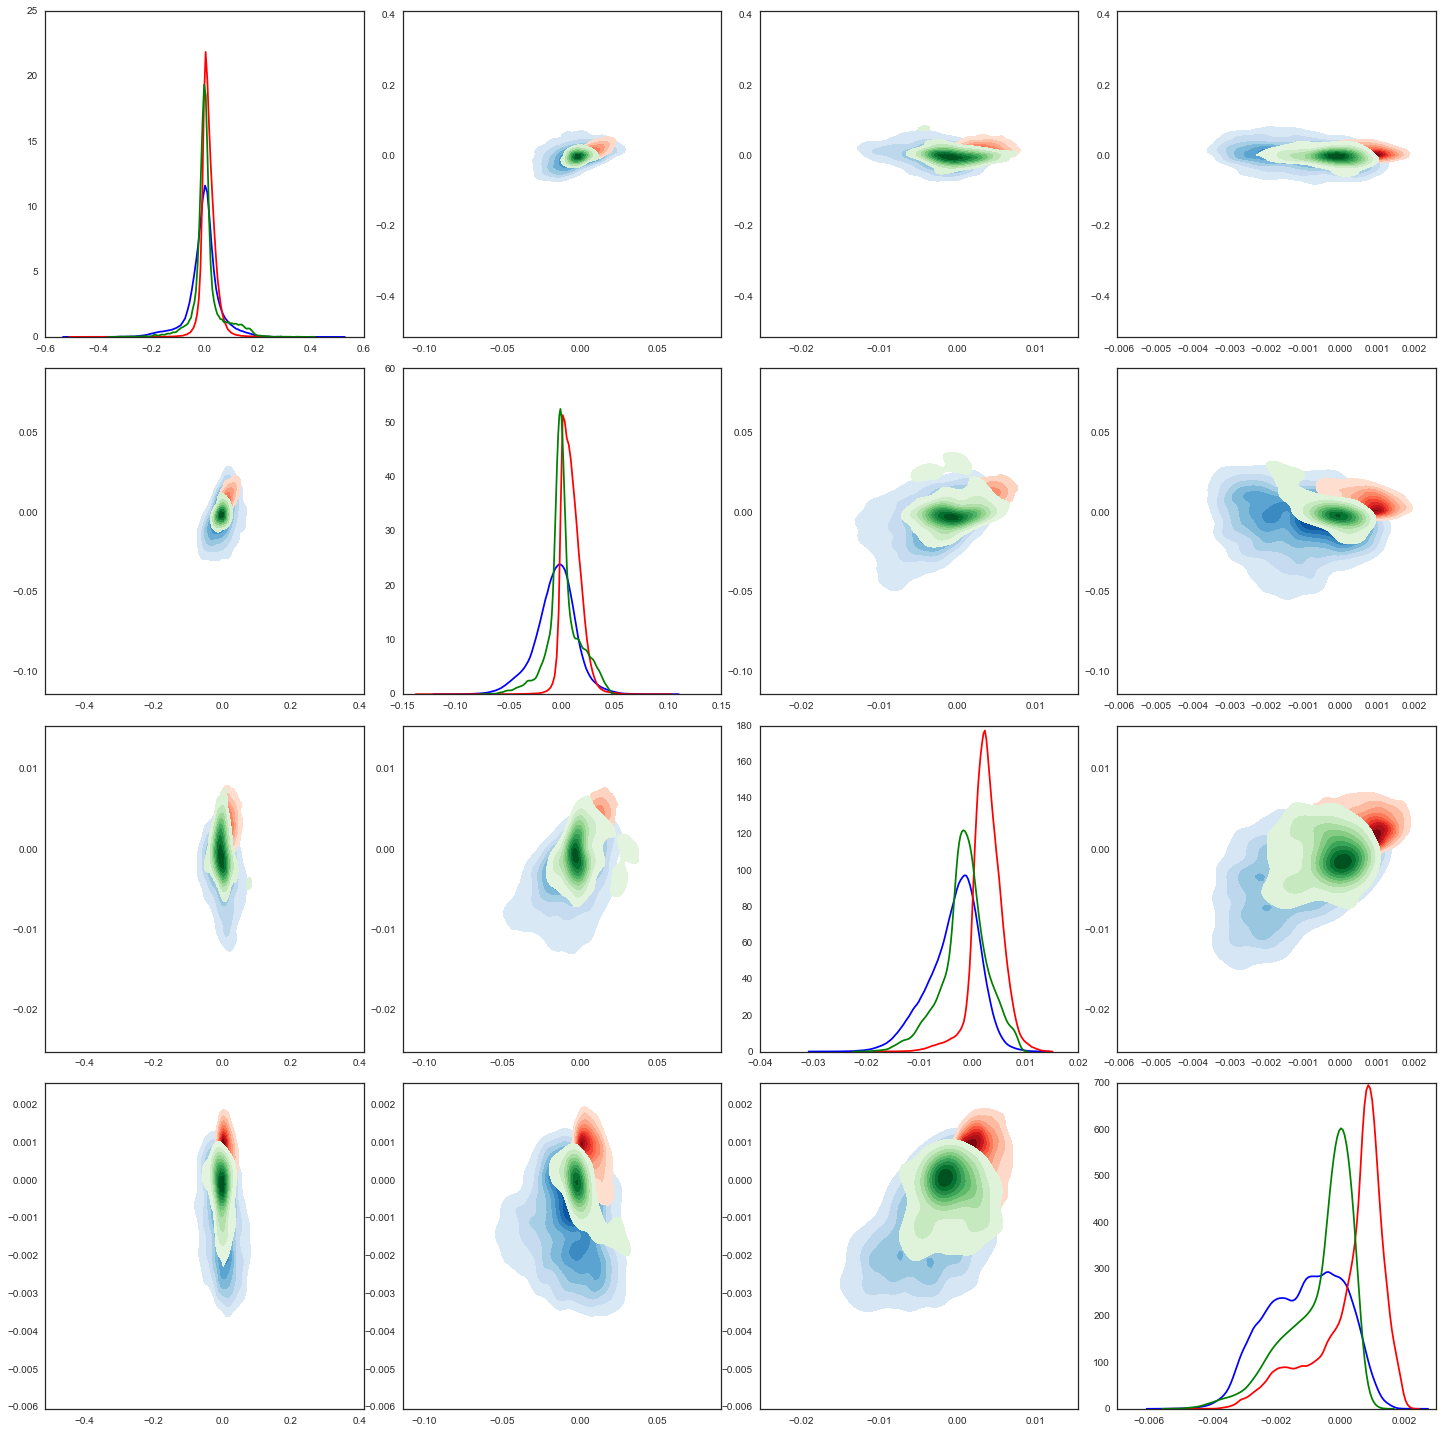

In [22]:
fig2 = scatter_plots(contrasts, classes, rtT2)

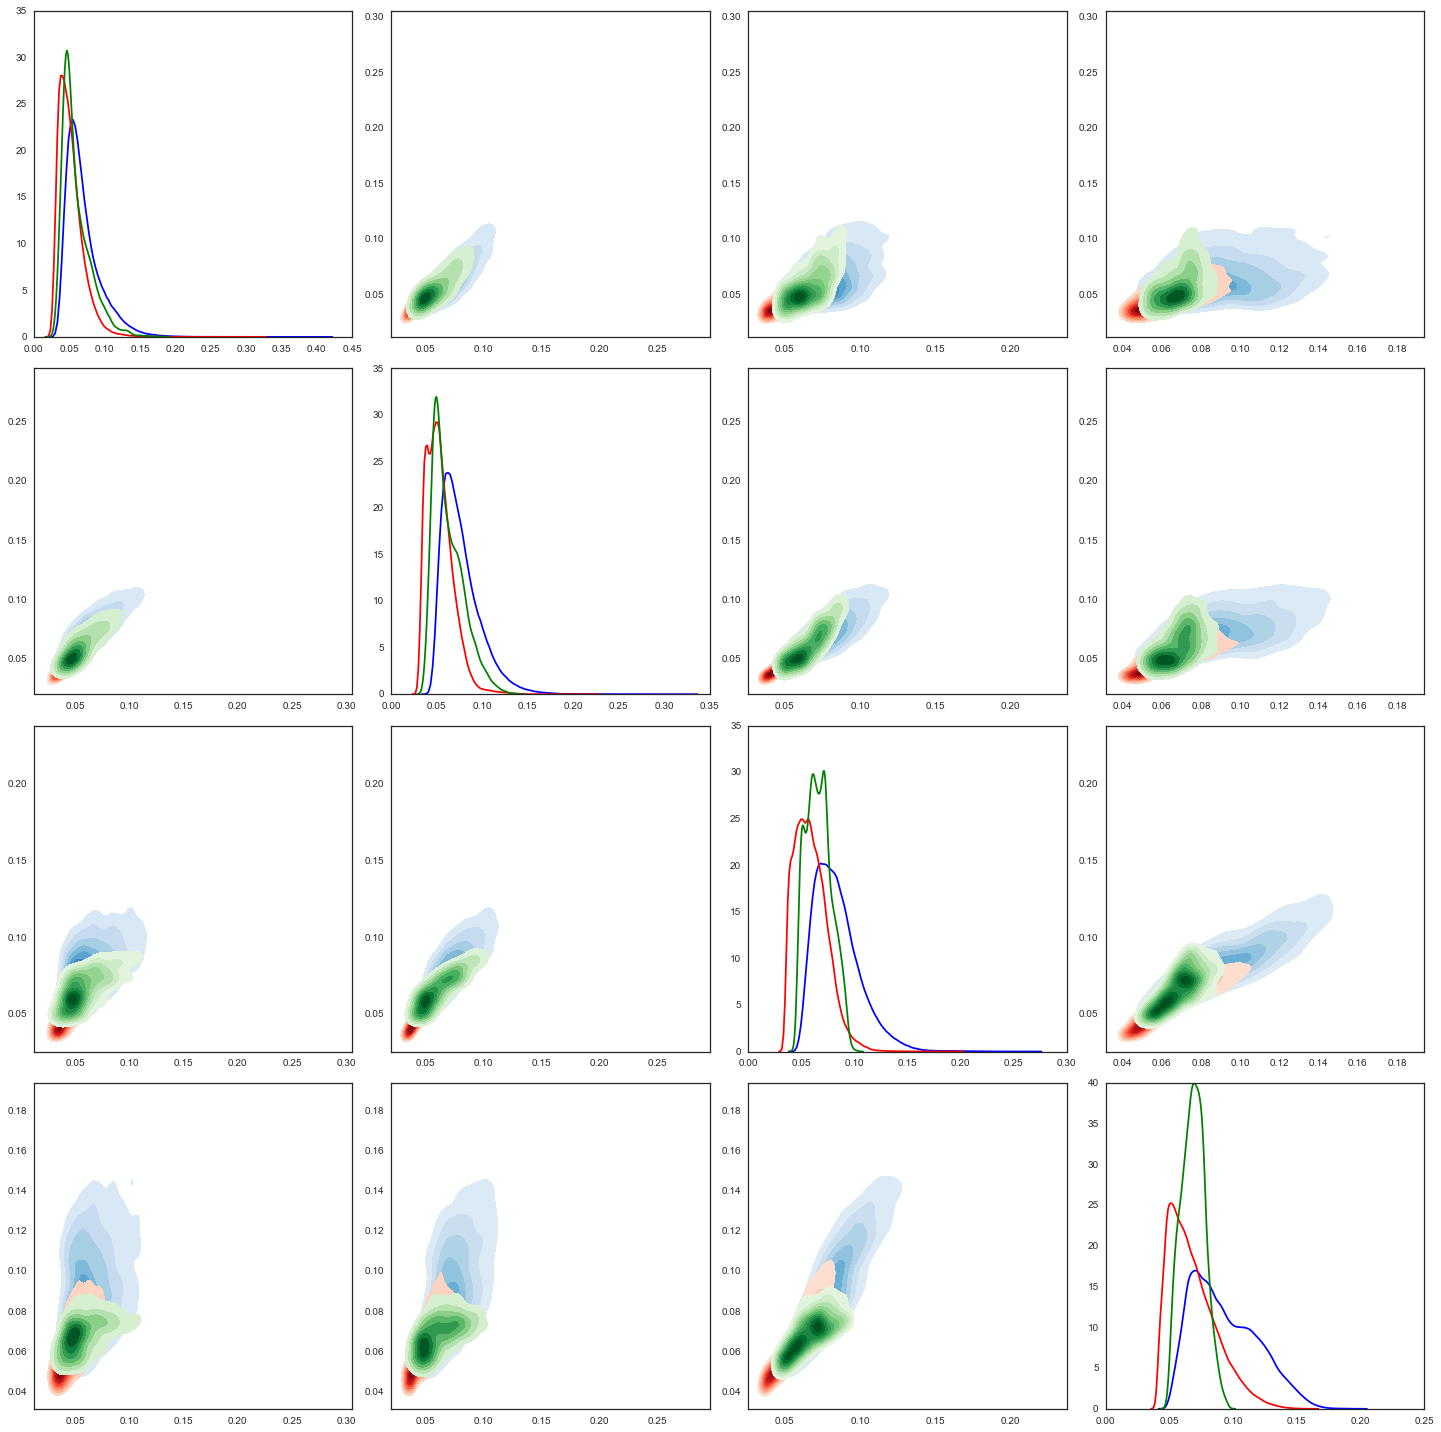

In [23]:
classes = ['gray', 'white', 'caudate']
contrasts = [3, 7, 11, 15]
fig1 = scatter_plots(contrasts, classes, rtT1)

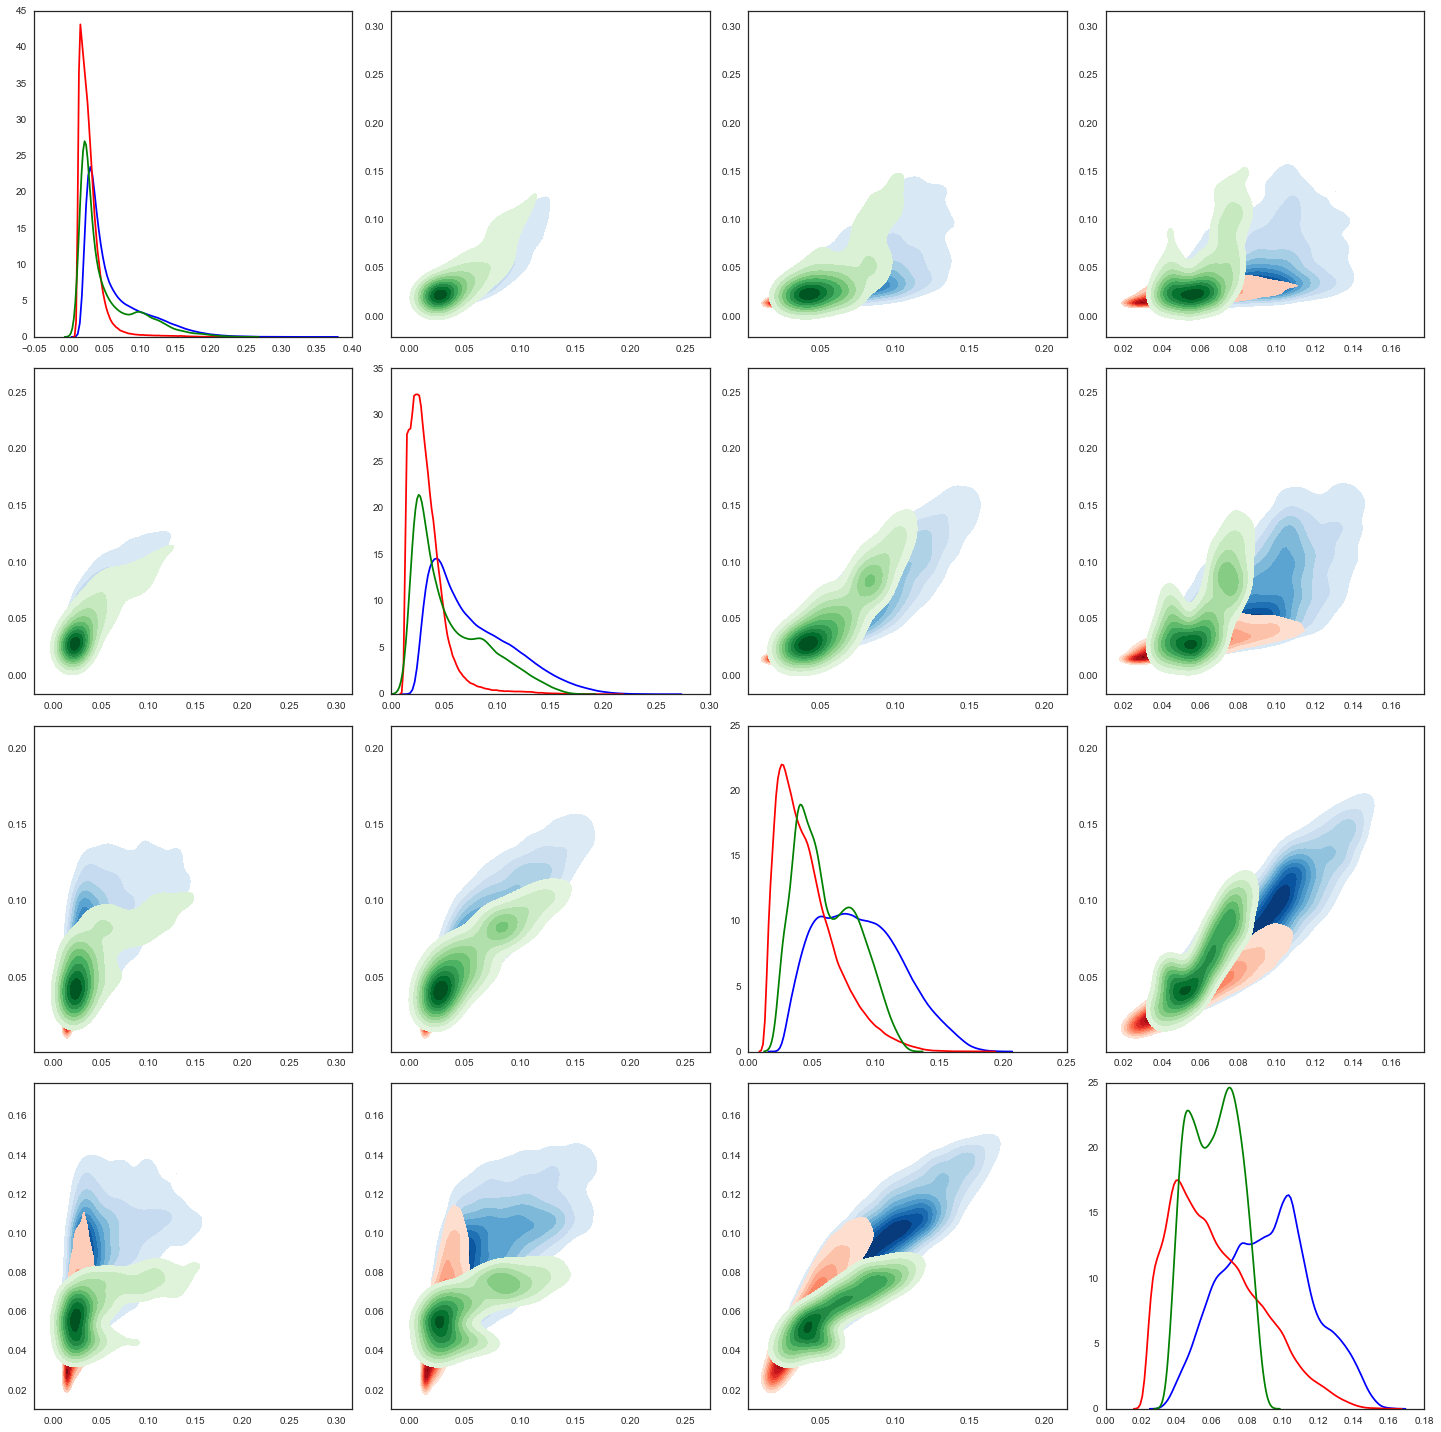

In [24]:
fig2 = scatter_plots(contrasts, classes, rtT2)